# Assignments_text_mining_amazon_reviews


1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

### To exttract reveiews from Amazon site we would will use Scrapy using below steps
1. installed Scrapy using conda install -c conda-forge scrapy
2. created project scrapy startproject Scrape_AmazonReviews
3. created spider using:  scrapy genspider amazon_review https://www.amazon.in/
4. Analyzed HTML structure of the webpage to identify classes that are used for Reviews: in our case html element ID used is cm_cr-review_list and calsses were .review-rating, and .review-text
5. created the python file for extracting reveiews into .csv file (using command : scrapy runspider Scrape_AmazonReviews\Scrape_AmazonReviews\spiders\extract_reviews.py -o extract_reviews_DT.csv)

import scrapy

class AmazonReviewsSpider(scrapy.Spider):

    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']
--  # Base URL for the product reviews
    myBaseUrl = "https://www.amazon.in/product-reviews/9387779262/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')
            
            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars': 
                      ''.join(review.xpath('.//text()').extract()),
                      'comment': 
                          ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1
 6. scrapy runspider extract_reviews.py -o extract_reviews_DT.csv

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=reviews = pd.read_csv("extract_reviews_DT.csv", encoding = 'unicode_escape', engine ='python')
reviews

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I have well resear...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Delivery was on ti...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Itâs a cute coll...
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Books are way to s...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n ...
...,...,...
1195,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Very good quality ...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n ...
1197,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Happy with purchas...
1198,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Must have library ...


In [3]:
print(reviews.count())

stars      1200
comment    1198
dtype: int64


In [4]:
reviews=reviews.dropna()

In [5]:
#check shape before droping NA
reviews.shape

(1198, 2)

## Text Preprocessing

In [6]:
reviews_stripped=[comment.strip() for comment in reviews.comment]

In [7]:
reviews_stripped

['I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more!',
 'Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your babyâ\x80\x99s will love it',
 'Itâ\x80\x99s a cute collection, but I wasnâ\x80\x99t expexting the size of the book to be this small . But still the books are awesome.  Have 12 leaflets in all the book',
 'Books are way to small for a child to learn. Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything. One should buy individual books rather than this library. A big no thi

In [8]:
reviews_stripped=[comment for comment in reviews_stripped if comment] # removes empty strings, because they are considered in Python as False
reviews_stripped

['I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more!',
 'Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your babyâ\x80\x99s will love it',
 'Itâ\x80\x99s a cute collection, but I wasnâ\x80\x99t expexting the size of the book to be this small . But still the books are awesome.  Have 12 leaflets in all the book',
 'Books are way to small for a child to learn. Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything. One should buy individual books rather than this library. A big no thi

In [9]:
# Joining the list into one string/text
reviews_text=' '.join(reviews_stripped)
reviews_text

'I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more! Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your babyâ\x80\x99s will love it Itâ\x80\x99s a cute collection, but I wasnâ\x80\x99t expexting the size of the book to be this small . But still the books are awesome.  Have 12 leaflets in all the book Books are way to small for a child to learn. Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything. One should buy individual books rather than this library. A big no this.Hope you al

In [10]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I have well researched many books  concluded to this one  I got it for 399 from amazon Colors are just perfect You might get feeling that books are small in size But if you carefully research  all board books are of this sizeBooks are very well designed Corners are kept rounded to avoid accidental hurting to your baby Content is well researched as well What more Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your babyâ\x80\x99s will love it Itâ\x80\x99s a cute collection but I wasnâ\x80\x99t expexting the size of the book to be this small  But still the books are awesome  Have 12 leaflets in all the book Books are way to small for a child to learn Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything One should buy individual books rather than this library A big no thisHope you all find this helpful 

In [11]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'have', 'well', 'researched', 'many', 'books', 'concluded', 'to', 'this', 'one', 'I', 'got', 'it', 'for', '399', 'from', 'amazon', 'Colors', 'are', 'just', 'perfect', 'You', 'might', 'get', 'feeling', 'that', 'books', 'are', 'small', 'in', 'size', 'But', 'if', 'you', 'carefully', 'research', 'all', 'board', 'books', 'are', 'of', 'this', 'sizeBooks', 'are', 'very', 'well', 'designed', 'Corners', 'are', 'kept']


In [13]:
len(text_tokens)

29139

In [14]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'Colors', 'perfect', 'You', 'might', 'get', 'feeling', 'books', 'small', 'size', 'But', 'carefully', 'research', 'board', 'books', 'sizeBooks', 'well', 'designed', 'Corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'Content', 'well', 'researched', 'well', 'What', 'Delivery', 'time', 'packaging', 'excellent', 'Board', 'books', 'superb', 'quality', 'came', 'card', 'bird', 'box', '10', 'books', 'nice', 'terms', 'quality', 'colour', 'go', 'babyâ\x80\x99s', 'love', 'Itâ\x80\x99s', 'cute', 'collection', 'wasnâ\x80\x99t', 'expexting', 'size', 'book', 'small', 'But', 'still', 'books', 'awesome', 'Have', '12', 'leaflets', 'book', 'Books', 'way', 'small', 'child', 'learn', 'Because', '1', '2', 'year', 'old', 'child', 'needs', 'see', 'bigger', 'pictures', 'order', 'understand', 'everything', 'One', 'buy', 'individual', 'books', 'rather', 'library', 'big', 'thisHope', 'find', 'helpful', 'media'

In [15]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'colors', 'perfect', 'you', 'might', 'get', 'feeling', 'books', 'small', 'size', 'but', 'carefully', 'research', 'board', 'books', 'sizebooks', 'well', 'designed', 'corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'content', 'well', 'researched', 'well', 'what', 'delivery', 'time', 'packaging', 'excellent', 'board', 'books', 'superb', 'quality', 'came', 'card', 'bird', 'box', '10', 'books', 'nice', 'terms', 'quality', 'colour', 'go', 'babyâ\x80\x99s', 'love', 'itâ\x80\x99s', 'cute', 'collection', 'wasnâ\x80\x99t', 'expexting', 'size', 'book', 'small', 'but', 'still', 'books', 'awesome', 'have', '12', 'leaflets', 'book', 'books', 'way', 'small', 'child', 'learn', 'because', '1', '2', 'year', 'old', 'child', 'needs', 'see', 'bigger', 'pictures', 'order', 'understand', 'everything', 'one', 'buy', 'individual', 'books', 'rather', 'library', 'big', 'thishope', 'find', 'helpful', 'media'

In [16]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['well', 'research', 'mani', 'book', 'conclud', 'one', 'got', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'care', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'kept', 'round', 'avoid', 'accident', 'hurt', 'babi', 'content', 'well', 'research', 'well', 'what', 'deliveri', 'time', 'packag', 'excel', 'board', 'book', 'superb', 'qualiti', 'came', 'card', 'bird', 'box', '10', 'book', 'nice', 'term', 'qualiti', 'colour', 'go', 'babyâ\x80\x99', 'love', 'itâ\x80\x99', 'cute', 'collect', 'wasnâ\x80\x99t', 'expext', 'size', 'book', 'small', 'but', 'still', 'book', 'awesom', 'have', '12', 'leaflet', 'book', 'book', 'way', 'small', 'child', 'learn', 'becaus', '1', '2', 'year', 'old', 'child', 'need', 'see', 'bigger', 'pictur', 'order', 'understand', 'everyth', 'one', 'buy', 'individu', 'book', 'rather', 'librari', 'big', 'thishop', 'find', 'help', 'media', 'could', 'load', 'â', 'excel', 'set', 'initi', 'basic', 'thing'

In [17]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

well researched many books concluded one got 399 amazon colors perfect you might get feeling books small size but carefully research board books sizebooks well designed corners kept rounded avoid accidental hurting baby content well researched well what delivery time packaging excellent board books superb quality came card bird box 10 books nice terms quality colour go babyâs love itâs cute collection wasnât expexting size book small but still books awesome have 12 leaflets book books way small child learn because 1 2 year old child needs see bigger pictures order understand everything one buy individual books rather library big thishope find helpful media could loaded â excellent set initial basic things child learn got multiple pages also inside book really impressed however wait little buy books child six months old every thing trying eat book well ðð » ââï¸ðð » ââï¸ðð » ââï¸ but keeping box anyways ð¤·ð » ââï¸ðð » ââï¸ðð » 

In [18]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'rounded', 'avoid', 'accidental', 'hurt', 'baby', 'content', 'well', 'research', 'well', 'what', 'delivery', 'time', 'packaging', 'excellent', 'board', 'book', 'superb', 'quality', 'come', 'card', 'bird', 'box', '10', 'book', 'nice', 'term', 'quality', 'colour', 'go', 'babyâ\x80\x99s', 'love', 'itâ\x80\x99s', 'cute', 'collection', 'wasnâ\x80\x99t', 'expexte', 'size', 'book', 'small', 'but', 'still', 'book', 'awesome', 'have', '12', 'leaflet', 'book', 'book', 'way', 'small', 'child', 'learn', 'because', '1', '2', 'year', 'old', 'child', 'need', 'see', 'big', 'picture', 'order', 'understand', 'everything', 'one', 'buy', 'individual', 'book', 'rather', 'library', 'big', 'thishope', 'find', 'helpful', 'medium', 'could', 'load', 'â', 'excelle

In [19]:
clean_reviews=' '.join(lemmas)
clean_reviews

'well research many book conclude one get 399 amazon color perfect you might get feel book small size but carefully research board book sizebook well design corner keep rounded avoid accidental hurt baby content well research well what delivery time packaging excellent board book superb quality come card bird box 10 book nice term quality colour go babyâ\x80\x99s love itâ\x80\x99s cute collection wasnâ\x80\x99t expexte size book small but still book awesome have 12 leaflet book book way small child learn because 1 2 year old child need see big picture order understand everything one buy individual book rather library big thishope find helpful medium could load â excellent set initial basic thing child learn get multiple page also inside book really impressed however wait little buy book child six month old every thing try eat book well ð\x9f\x99\x86ð\x9f\x8f » â\x80\x8dâ\x99\x80ï¸\x8fð\x9f\x99\x86ð\x9f\x8f » â\x80\x8dâ\x99\x80ï¸\x8fð\x9f\x99\x86ð\x9f\x8f » â\x80\x8dâ\x99\x80ï¸\x8f but 

## Feature Extaction

### 1. Using CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [21]:
print(cv.vocabulary_)

{'well': 2346, 'research': 1842, 'many': 1347, 'book': 345, 'conclude': 555, 'one': 1510, 'get': 910, '399': 71, 'amazon': 182, 'color': 516, 'perfect': 1590, 'you': 2422, 'might': 1371, 'feel': 837, 'small': 1977, 'size': 1955, 'but': 418, 'carefully': 448, 'board': 340, 'sizebook': 1959, 'design': 658, 'corner': 584, 'keep': 1198, 'rounded': 1864, 'avoid': 255, 'accidental': 123, 'hurt': 1071, 'baby': 271, 'content': 568, 'what': 2355, 'delivery': 647, 'time': 2182, 'packaging': 1555, 'excellent': 789, 'superb': 2081, 'quality': 1735, 'come': 534, 'card': 443, 'bird': 330, 'box': 399, '10': 0, 'nice': 1454, 'term': 2115, 'colour': 523, 'go': 926, 'babyâ': 279, 'love': 1324, 'itâ': 1182, 'cute': 617, 'collection': 510, 'wasnâ': 2329, 'expexte': 803, 'still': 2052, 'awesome': 258, 'have': 1016, '12': 9, 'leaflet': 1257, 'way': 2336, 'child': 480, 'learn': 1261, 'because': 303, 'year': 2412, 'old': 1507, 'need': 1440, 'see': 1902, 'big': 323, 'picture': 1607, 'order': 1527, 'understand'

In [22]:
print(cv.get_feature_names()[150:300])

['again', 'againð', 'age', 'agea', 'agian', 'agowhen', 'ahead', 'aheadð', 'aid', 'airplane', 'al', 'alfabet', 'all', 'allclear', 'allhe', 'allow', 'allworth', 'almost', 'alone', 'along', 'alot', 'alphabet', 'alphabetsthe', 'already', 'also', 'alternative', 'although', 'always', 'amazed', 'amazing', 'amazingi', 'amazingly', 'amazon', 'amazone', 'american', 'amlost', 'amount', 'and', 'animal', 'animalsbird', 'animate', 'anither', 'another', 'ant', 'any', 'anymore', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'apartwhen', 'apko', 'appeal', 'appealing', 'appear', 'appearance', 'appel', 'apple', 'apply', 'appreciate', 'apprehensive', 'appropriate', 'apt', 'aptly', 'area', 'around', 'aroundlovely', 'aroundother', 'arrange', 'arrangment', 'arrival', 'arrive', 'arsenal', 'article', 'as', 'aside', 'ask', 'aso', 'assemble', 'asset', 'assorted', 'assume', 'at', 'atleast', 'attach', 'attempt', 'attention', 'atteractiveð', 'attract', 'attractive', 'attractiveeasy', 'attractivemy', 'attrac

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print(reviewscv.toarray().shape)

(18256, 2443)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [25]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [26]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', 'also', 'amazing', 'amazon', 'animal', 'attractive', 'awesome', 'baby', 'big', 'bit', 'board', 'book', 'box', 'bright', 'but', 'buy', 'child', 'clear', 'collection', 'color', 'colour', 'colourful', 'content', 'could', 'daughter', 'do', 'easily', 'easy', 'enjoy', 'excellent', 'first', 'get', 'gift', 'give', 'go', 'good', 'great', 'hand', 'happy', 'hard', 'he', 'help', 'hold', 'image', 'its', 'keep', 'kid', 'learn', 'library', 'like', 'little', 'look', 'lot', 'love', 'make', 'many', 'money', 'month', 'much', 'must', 'my', 'nice', 'not', 'old', 'one', 'page', 'paper', 'perfect', 'picture', 'play', 'price', 'product', 'purchase', 'quality', 'read', 'really', 'recommend', 'see', 'set', 'she', 'show', 'size', 'small', 'son', 'start', 'tear', 'thick', 'thing', 'this', 'time', 'toddler', 'use', 'useful', 'value', 'very', 'well', 'word', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [28]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '10month', '12', '13', '14', '15', '16', '20', '23', '25', '34', '399', '400', '499', 'abc', 'able', 'absolutely', 'actually', 'adult', 'affordable', 'age', 'ahead', 'all', 'almost', 'alphabet', 'already', 'also', 'always', 'amazing', 'amazon', 'and', 'animal', 'apart', 'appropriate', 'apt', 'around', 'arrive', 'as', 'ask', 'assume', 'at', 'atleast', 'attach', 'attention', 'attract', 'attractive', 'available', 'avoid', 'away', 'awesome', 'baby', 'babys', 'back', 'background', 'bad', 'basic', 'bcoz', 'be', 'beautiful', 'beginner', 'believe', 'big', 'bind', 'bird', 'birthday', 'bit', 'bite', 'board', 'book', 'box', 'boy', 'bright', 'bring', 'build', 'busy', 'but', 'buy', 'buying', 'can', 'card', 'cardboard', 'carry', 'case', 'change', 'check', 'chew', 'child', 'children', 'choice', 'choose', 'clarity', 'clean', 'clear', 'cm', 'collection', 'color', 'colorful', 'colour', 'colourful', 'come', 'common', 'compact', 'compare', 'complete', 'condition', 'confuse', 'contain', 'content', '

### Generate Word Cloud

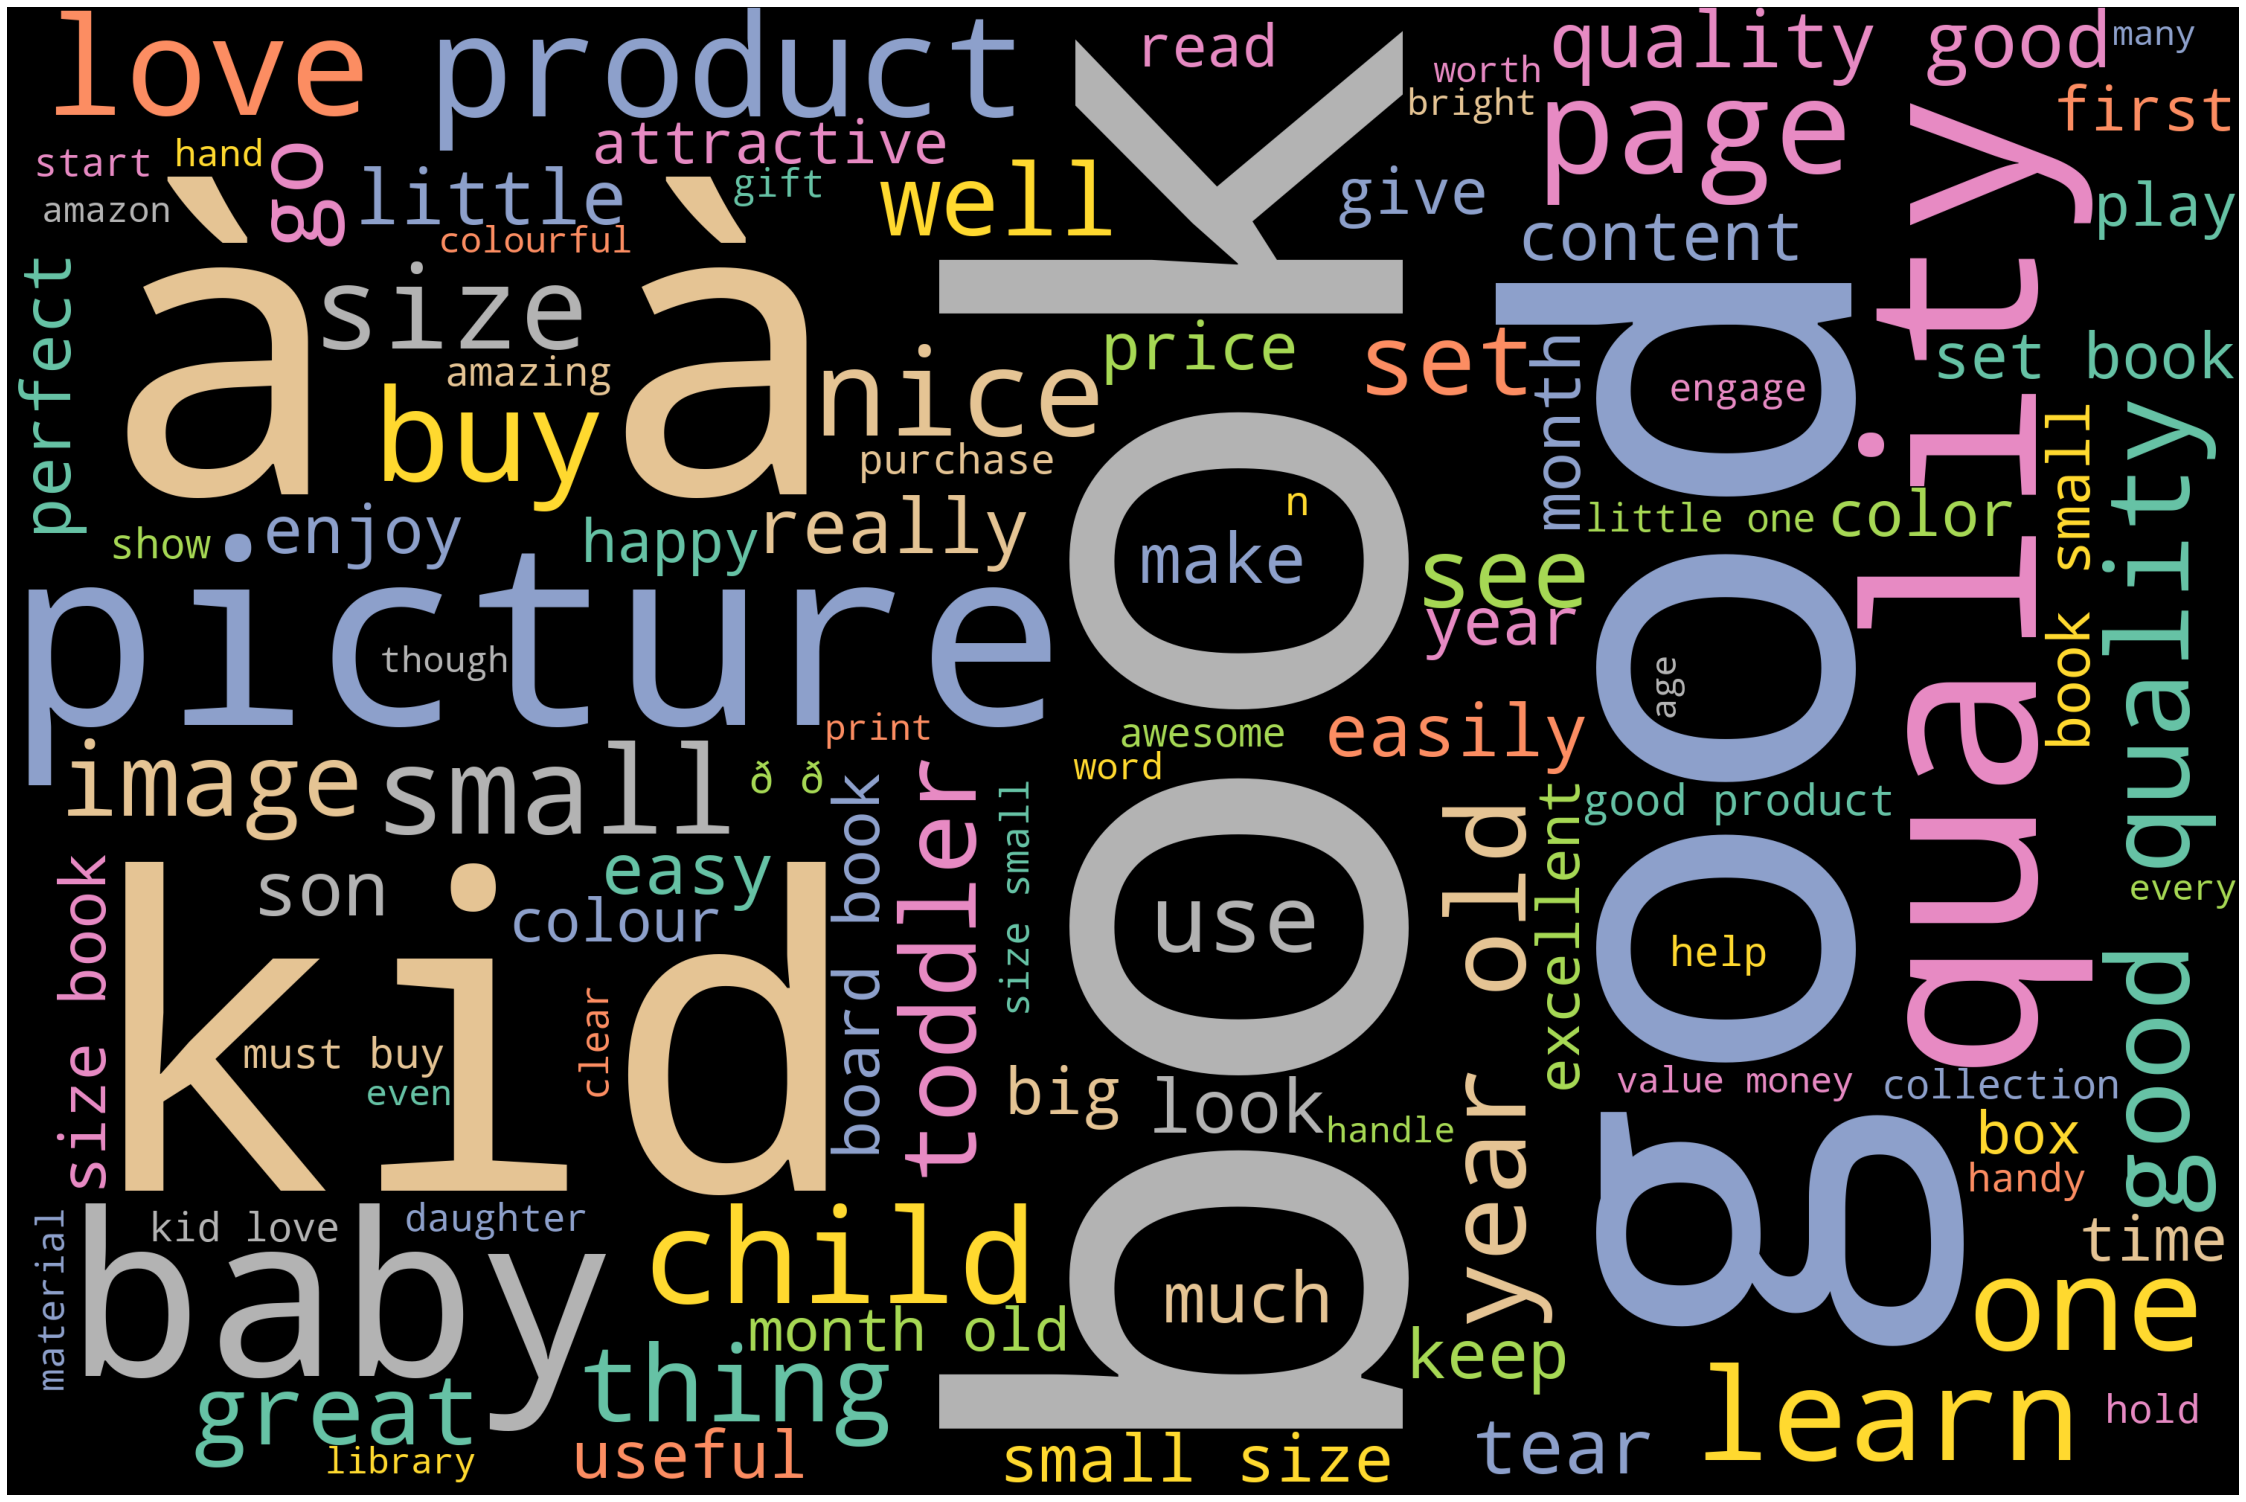

In [29]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [30]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [31]:
for token in doc_block[100:200]:
    print(token,token.pos_)

thishope NOUN
find VERB
helpful ADJ
medium NOUN
could AUX
load VERB
â DET
excellent ADJ
set VERB
initial ADJ
basic ADJ
thing NOUN
child NOUN
learn VERB
get VERB
multiple ADJ
page NOUN
also ADV
inside ADP
book NOUN
really ADV
impressed ADJ
however ADV
wait VERB
little ADJ
buy NOUN
book NOUN
child NOUN
six NUM
month NOUN
old ADJ
every DET
thing NOUN
try VERB
eat VERB
book NOUN
well ADV
ðð PUNCT
» NOUN
ââï¸ðð NOUN
» NOUN
ââï¸ðð INTJ
» NOUN
ââï¸ NOUN
but CCONJ
keep VERB
box NOUN
anyways ADV
ð¤·ð NOUN
» NOUN
ââï¸ðð NOUN
» NOUN
ââï¸ðð ADJ
» X
ââï¸ NOUN
love NOUN
product NOUN
muchmaybe ADV
15 NUM
year NOUN
old ADJ
daughterððof PROPN
course NOUN
love VERB
itthe ADJ
quality NOUN
book NOUN
much ADV
high ADJ
mark NOUN
content NOUN
much ADJ
appeal VERB
informative ADJ
age NOUN
till SCONJ
3or4so NOUN
use VERB
long ADJ
time NOUN
even ADV
though SCONJ
bit NOUN
apprehensive ADJ
costi NOUN
realize VERB
book NOUN
worth ADJ
every DET
penny N

In [32]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['use', 'time', 'bit', 'costi', 'realize', 'book', 'penny', 'product', 'love', 'follow', 'reason', 'page', 'tear', 'baby', 'bind', 'picture', 'page', 'picture', 'baby', 'product', 'baby', 'month', 'age', 'show', 'picture', 'infant', 'read', 'repeat', 'practice', 'register', 'mind', 'practice', 'help', 'baby', 'try', 'talk', 'book', 'month', 'baby', 'see', 'image', 'travel', 'prefer', 'show', 'book', 'engage', 'phone', 'buy', 'write', 'review', 'month', 'usage', 'build', 'board', 'book', 'son', 'llhad', 'abuse', 'length', 'bend', 'son', 'poured', 'water', 'stand', 'try', 'press', 'bind', 'run', 'book', 'seem', 'water', 'water', 'proof', 'come', 'content', 'son', 'learn', 'lot', 'month', 'tip', 'read', 'book', 'atleast', 'min', 'day', 'develop', 'glance', 'reading', 'board', 'book', 'happy', 'purchase', 'book', 'year', 'paper', 'quality', 'type', 'thing', 'picture', 'need']


In [33]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,book,967
1,quality,377
2,kid,322
3,size,246
4,picture,231
5,love,230
6,product,225
7,baby,221
8,page,181
9,buy,178


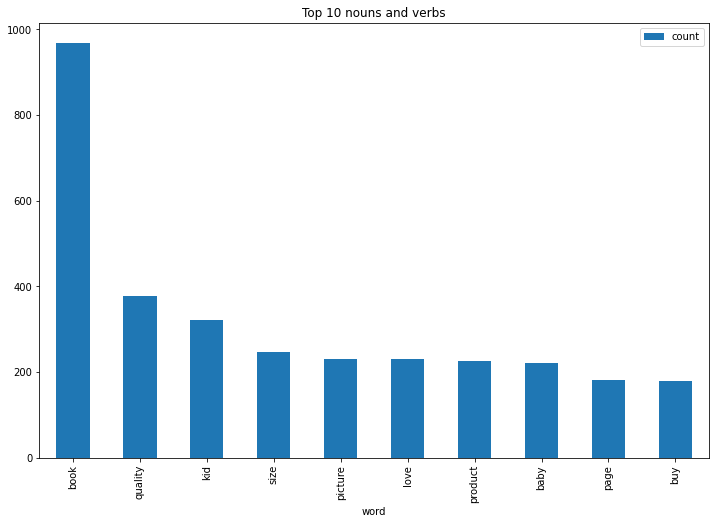

In [34]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [35]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews_stripped))
sentences

['I have well researched many books & concluded to this one.',
 'I got it for 399 from amazon.',
 'Colors are just perfect.',
 'You might get feeling that books are small in size.',
 'But if you carefully research , all board books are of this size.Books are very well designed.',
 'Corners are kept rounded to avoid accidental hurting to your baby.',
 'Content is well researched as well... What more!',
 'Delivery was on time packaging was excellent the Board books are of superb quality came in a card bird box there are 10 books each of which is very nice in terms of quality and colour go for it your babyâ\x80\x99s will love it Itâ\x80\x99s a cute collection, but I wasnâ\x80\x99t expexting the size of the book to be this small .',
 'But still the books are awesome.',
 'Have 12 leaflets in all the book Books are way to small for a child to learn.',
 'Because a 1 or 2 year old child needs to see bigger pictures in order to understand everything.',
 'One should buy individual books rather t

In [36]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I have well researched many books & concluded ...
1,I got it for 399 from amazon.
2,Colors are just perfect.
3,You might get feeling that books are small in ...
4,"But if you carefully research , all board book..."
...,...
2106,Thanku Amazon.
2107,Very good quality book.. my 8 months baby is f...
2108,Â Awesome product my little girl very happy wi...
2109,Happy with purchased Must have library for kid...


In [37]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [38]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [39]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [40]:
# manual testing
calculate_sentiment(text='good book for ')

3

In [41]:
# manual testing
calculate_sentiment(text='worst book ')

-3

In [42]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       3
3       0
4       2
       ..
2106    0
2107    7
2108    3
2109    3
2110    3
Name: sentiment_value, Length: 2111, dtype: int64

In [43]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       11
1        7
2        4
3       10
4       17
        ..
2106     2
2107    28
2108    13
2109     8
2110    16
Name: word_count, Length: 2111, dtype: int64

In [44]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
693,No worry of these getting torn or damage if yo...,-7,19
1205,The number book has a problem.The pages are mi...,-6,65
526,He can roughly use it without a worry of damage.,-6,10
156,This are pocket books.Wrong way to sell item b...,-6,35
5,Corners are kept rounded to avoid accidental h...,-5,11
...,...,...,...
1747,"Just opened the box of books, loved it.My one ...",24,43
2022,It's very nice with pictures.It's more nice as...,25,83
149,Quality of the Books is amazing.. overall very...,25,83
1794,"Very good build quality is great, clear pictur...",26,57


In [45]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    2111.000000
mean        2.698247
std         3.629708
min        -7.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        28.000000
Name: sentiment_value, dtype: float64

In [46]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,I have well researched many books & concluded ...,0,11
1,I got it for 399 from amazon.,0,7
3,You might get feeling that books are small in ...,0,10
5,Corners are kept rounded to avoid accidental h...,-5,11
6,Content is well researched as well... What more!,0,8
...,...,...,...
2101,They can even play with it :) It could have be...,0,12
2102,The colours book will definitely confuse the k...,-2,8
2104,Small size and baby can comfortably hold it.,0,8
2105,Few pages have 3-4 pictures in it so size is s...,0,16


In [47]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,Colors are just perfect.,3,4
4,"But if you carefully research , all board book...",2,17
7,Delivery was on time packaging was excellent t...,16,62
8,But still the books are awesome.,4,6
10,Because a 1 or 2 year old child needs to see b...,1,18
...,...,...,...
2103,Quality superb Nice to handle for baby view wi...,11,13
2107,Very good quality book.. my 8 months baby is f...,7,28
2108,Â Awesome product my little girl very happy wi...,3,13
2109,Happy with purchased Must have library for kid...,3,8


In [48]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I have well researched many books & concluded ...,0,11,0
1,I got it for 399 from amazon.,0,7,1
2,Colors are just perfect.,3,4,2
3,You might get feeling that books are small in ...,0,10,3
4,"But if you carefully research , all board book...",2,17,4
...,...,...,...,...
2106,Thanku Amazon.,0,2,2106
2107,Very good quality book.. my 8 months baby is f...,7,28,2107
2108,Â Awesome product my little girl very happy wi...,3,13,2108
2109,Happy with purchased Must have library for kid...,3,8,2109


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

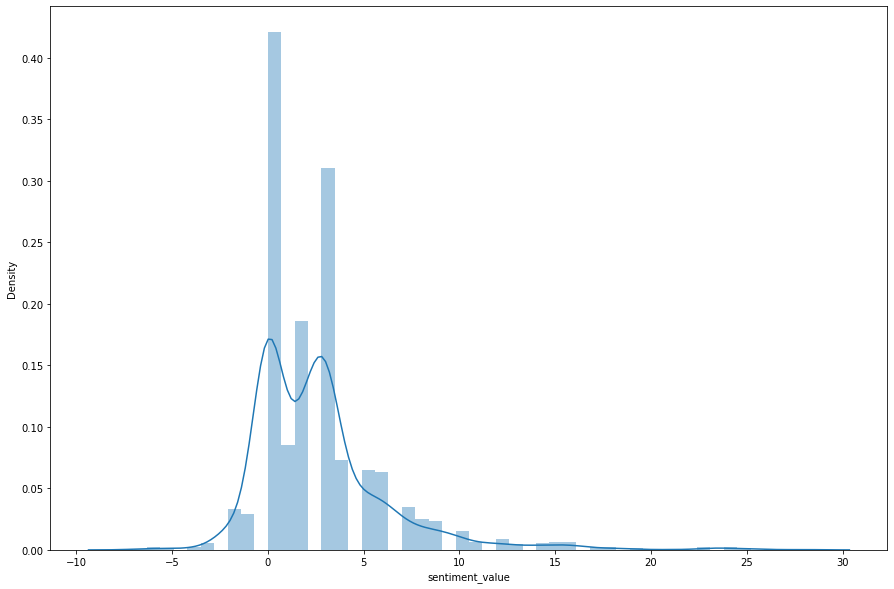

In [49]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

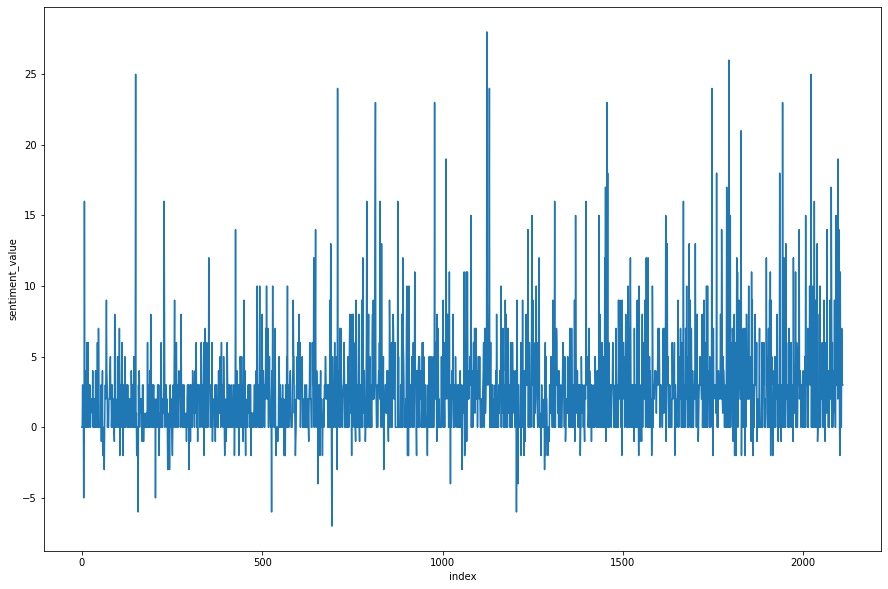

In [50]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)